In [1]:
import Simulation as G
import RotRep as R
import numpy as np
import matplotlib.pyplot as plt
from ImageData import SimImage
from matplotlib.patches import Polygon, Path, PathPatch
from matplotlib.collections import PatchCollection
#from matplotlib import path
from scipy.optimize import basinhopping
import OverlapInfo

exp={'energy':71.676}
etalimit=81/180.0*np.pi
grainpos=np.array([0, 0.0974279, 0])
orien=R.EulerZXZ2Mat(np.array([89.5003, 80.7666, 266.397])/180.0*np.pi)

reload(G)
sample=G.CrystalStr('Ti7')
#sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
#sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(10)


Det1=G.Detector()
Det1.Move(935.166,1998.96,np.array([4.72573,0,0]),R.EulerZXZ2Mat(np.array([90.6659, 89.4069,359.073])/180.0*np.pi))
Det2=G.Detector()
Det2.Move(949.46,1996.15,np.array([6.67079,0,0]),R.EulerZXZ2Mat(np.array([89.4765, 90.2675,359.22])/180.0*np.pi))
Det3=G.Detector()
Det3.Move(966.576,1994.19,np.array([8.63154,0,0]),R.EulerZXZ2Mat(np.array([89.24, 90.545,359.188])/180.0*np.pi))

<IPython.core.display.Javascript object>


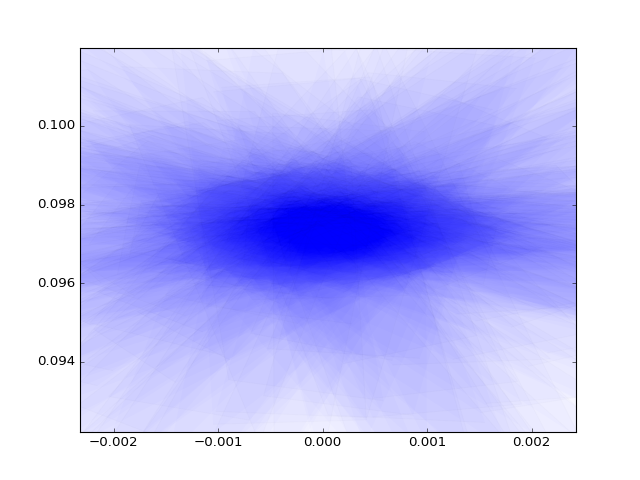

In [6]:
Peaks1,Gs1,PeaksInfo1=G.GetProjectedVertex(Det1,sample,orien,etalimit,grainpos,getPeaksInfo=True,**exp)
patches=[]
for i in range(len(Peaks1)):
    tPeak=Peaks1[i]
    tPeakInfo=PeaksInfo1[i]
    a1=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]),tPeak[2]/180.0*np.pi,tPeakInfo['2Theta'],tPeakInfo['eta'])
    a2=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]),tPeak[2]/180.0*np.pi,tPeakInfo['2Theta'],tPeakInfo['eta'])
    a3=Det1.BackProj(Det1.Idx2LabCord(tPeak[0]+1,tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeakInfo['2Theta'],tPeakInfo['eta'])
    a4=Det1.BackProj(Det1.Idx2LabCord(tPeak[0],tPeak[1]+1),tPeak[2]/180.0*np.pi,tPeakInfo['2Theta'],tPeakInfo['eta'])
    a=np.stack((a1,a2,a3,a4))
    patches.append(Path([a1,a2,a3,a4]))


fig,ax=plt.subplots()

for patch in patches: 
    ax.add_patch(PathPatch(patch,alpha=0.01))

plt.show()

In [107]:
tp=(np.random.random((100,2))-0.5)*0.0001+[0,0.0974279]
b=[]
for i in range(len(patches)):
    b.append(patches[i].contains_points(tp))
b=np.asarray(b)

<IPython.core.display.Javascript object>


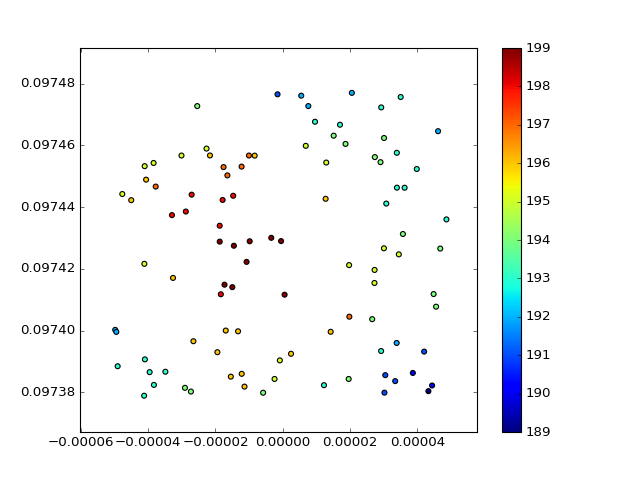

In [108]:
plt.scatter(tp[:,0],tp[:,1],c=b.sum(axis=0))
plt.colorbar()
plt.show()

In [2]:
reload(G)
SimData1=SimImage(720,1)

sw=0.001
d1=np.array([sw,0,0])
d2=np.array([sw,sw,0])
d3=np.array([0,sw,0])

de=np.array([0.01,0.01,0])/180.0*np.pi

gridX,gridY=np.meshgrid(np.arange(-50,50),np.arange(-50,50))
for i in range(gridX.shape[0]):
    for j in range(gridX.shape[1]):
        d=grainpos+gridX[i,j]*d1+gridY[i,j]*d3
        dm=R.EulerZXZ2Mat(de*[i,j,0]).dot(orien)
        tP0,tG0=G.GetProjectedVertex(Det1,sample,dm,etalimit,d,getPeaksInfo=False,bIdx=False,**exp)
        tP1,tG1=G.GetProjectedVertex(Det1,sample,dm,etalimit,d+d1,getPeaksInfo=False,bIdx=False,**exp)
        tP2,tG2=G.GetProjectedVertex(Det1,sample,dm,etalimit,d+d2,getPeaksInfo=False,bIdx=False,**exp)
        tP3,tG3=G.GetProjectedVertex(Det1,sample,dm,etalimit,d+d3,getPeaksInfo=False,bIdx=False,**exp)

        for ii in range(len(tP0)):
            xy=np.stack((tP0[ii],tP1[ii],tP2[ii],tP3[ii]))[:,:2]
            omega=int((tP0[ii][2]+90)*4)
            SimData1.AddHit(G.digitize(xy),omega,0)

In [3]:
SimData1.MakeSet()

In [9]:
import pickle
pickle.dump(SimData1,open('001SimData.pickle','wb'))

<IPython.core.display.Javascript object>


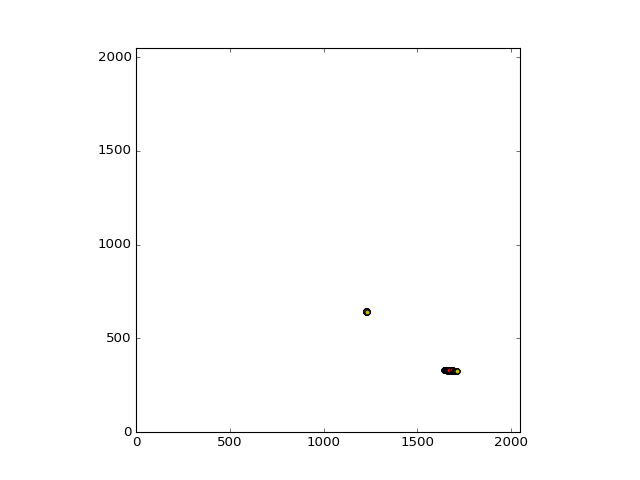

In [8]:
ii=16
points=np.array(list(SimData1.images[ii][0]))
if len(points)>0:
    plt.scatter(2047-points[:,0],2047-points[:,1],c='b')
    plt.axis('scaled')
    plt.xlim((0,2048))
    plt.ylim((0,2048))
jj=17
points=np.array(list(SimData1.images[jj][0]))
if len(points)>0:
    plt.scatter(2047-points[:,0],2047-points[:,1],c='r')
    plt.axis('scaled')
    plt.xlim((0,2048))
    plt.ylim((0,2048))
kk=18
points=np.array(list(SimData1.images[kk][0]))
if len(points)>0:
    plt.scatter(2047-points[:,0],2047-points[:,1],c='y')
    plt.axis('scaled')
    plt.xlim((0,2048))
    plt.ylim((0,2048))

plt.show()

<IPython.core.display.Javascript object>


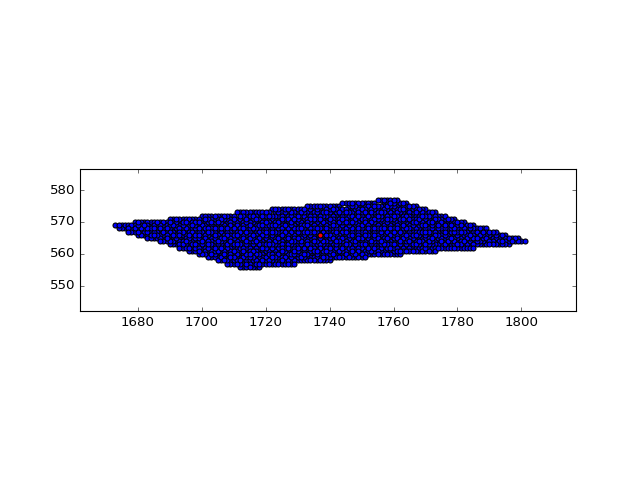

In [89]:
%matplotlib notebook
ii=27
tPeaks=Peaks1
b=np.array(list(SimData1.images[int((tPeaks[ii][2]+90)*4)][0]))
plt.scatter(2047-b[:,0],2047-b[:,1],c='b')


plt.scatter(2047-tPeaks[ii][0],2047-tPeaks[ii][1],c='r')

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

In [17]:
def CostWrapper(r):
#    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[1],r[3],r[4]],[r[2],r[4],r[5]]])
#    strain=np.eye(3)+np.array([[r[0],r[1],r[2]],[r[6],r[3],r[4]],[r[7],r[8],r[5]]])
#    oriandstrain=np.eye(3)+np.array([[r[0],r[1],0],[r[1],r[2],0],[0,0,r[3]]])
    oriandstrain=R.EulerZXZ2Mat(r)
    trans=oriandstrain.dot(orien)
#    trans=strain.dot(orien)
    Peaks1,Gs1=G.GetProjectedVertex(Det1,sample,trans,etalimit,grainpos,**exp)
    newScore1=OverlapInfo.NaiveCostFn(SimData1,Peaks1,0)
    Score=newScore1
    return -Score   

In [23]:
CostWrapper(de*10+[-0.001,0,0])

-0.8241206030150754

In [40]:
tp=(np.random.random((1000,3))-0.5)*[0.004,0.0004,0.004]
b=[]
for i in range(len(tp)):
    if CostWrapper(de*10+tp[i])<-198/199.0:
        b.append(i)
tp=tp[b]

In [55]:
for i in range(len(tp)):
    print R.Misorien2FZ1(R.EulerZXZ2Mat(de*10),R.EulerZXZ2Mat(de*10+tp[i]))[1]/np.pi*180

[[ 0.0067816]]
[[ 0.01129799]]
[[ 0.01360828]]
[[ 0.01326859]]
[[ 0.00830027]]
[[ 0.0027901]]
[[ 0.01315352]]
[[ 0.0094102]]
[[ 0.00734426]]
[[ 0.01062994]]
[[ 0.0113584]]
[[ 0.01361957]]
[[ 0.00717605]]
[[ 0.00490413]]
[[ 0.01346191]]
[[ 0.01217032]]
[[ 0.01151177]]
[[ 0.00942226]]
[[ 0.00954544]]
[[ 0.00908635]]
[[ 0.00806331]]
[[ 0.00950863]]
[[ 0.00481103]]
[[ 0.01133949]]
[[ 0.01262922]]
[[ 0.00997905]]
[[ 0.01275469]]
[[ 0.00720357]]
[[ 0.0017733]]
[[ 0.00944683]]
[[ 0.0074015]]
[[ 0.0111645]]
[[ 0.00961769]]
[[ 0.00693194]]


In [24]:
0.001/np.pi*180

0.057295779513082325

<IPython.core.display.Javascript object>


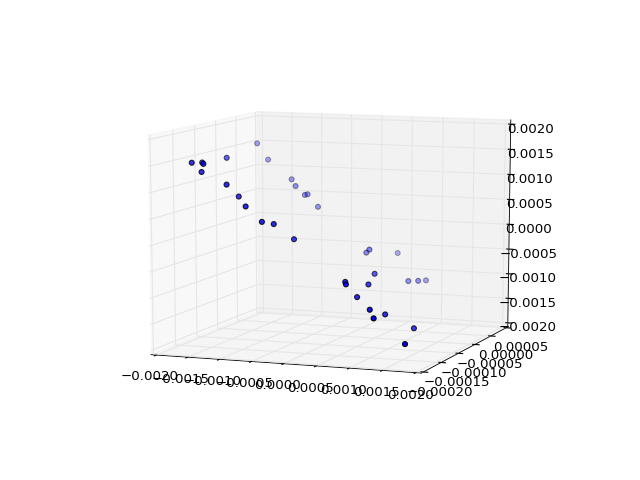

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tp[:,0],tp[:,1],tp[:,2])
plt.show()

In [25]:
oriandstrain

array([[ 2.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 0.,  0.,  2.]])

In [1]:
import numpy as np
a=np.zeros((2,3))

In [3]:
list(a)

[array([ 0.,  0.,  0.]), array([ 0.,  0.,  0.])]

In [5]:
%matplotlib notebook